#Cleaning, EDA on currency data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
directory_in_str = '/content/drive/MyDrive/home_repo_big_data/data/market/Currencies'
directory = os.fsencode(directory_in_str)
ds = '/content/drive/MyDrive/home_repo_big_data/data/market/Currencies/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    df = pd.read_csv(directory_in_str + '/' + filename)
    if filename.endswith(".csv"):
        if 'DATE' in df.columns:
            df.rename(columns={'DATE': 'Date'}, inplace=True)
        if 'date' in df.columns:
            df.rename(columns={'date': 'Date'}, inplace=True)
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])

        df.to_csv(ds + 'Cleaned_' + filename.split('.')[0][17:].replace('USD','') + '.csv', index=False, header=True)
        continue
    else:
        continue

In [ ]:
# Repeat this code for 'EUR' and 'GPB'
new_path = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Currencies/Converted_AUD.csv'
df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/market/Currencies/Cleaned_AUD.csv')
columns = [df.columns.values[1], df.columns.values[3], df.columns.values[4], df.columns.values[5]]
for col in columns:
    df[col] = df[col].apply(lambda x: 1 / x)
df.to_csv(new_path, index=False, header=True)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/clean_data/market/Currencies/Converted_AUD.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-11-23,1.367054,N/A,1.372684,1.366120,1.372872
1,2020-11-22,1.367428,N/A,1.369488,1.364629,1.370051
2,2020-11-20,1.369113,N/A,1.372307,1.365188,1.376084
3,2020-11-19,1.371554,N/A,1.372307,1.370802,1.376084
4,2020-11-18,1.370614,N/A,1.368925,1.368551,1.372684


In [11]:
def each_cur(df):
    close_vals = []
    for i in range(len(df[' Close/Last'])-1, -1, -1):
        close_vals.append(df[' Close/Last'][::-1][i])
    return close_vals  

In [12]:
directory_in_str = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Currencies'
directory = os.fsencode(directory_in_str)
ds = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Currencies/'

file_order = []
all_close_vals = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        
        file_order.append(filename[10:13])
        df = pd.read_csv(ds + filename)
        close_vals = each_cur(df)
        all_close_vals.append(close_vals)

        continue
    else:
        continue

In [19]:
cur_dict = {'AUD' : 'Australian Dollar',
            'BRL' : 'Brazilian Real',
            'CAD' : 'Canadian Dollar',
            'EUR' : 'Euro',
            'CHF' : 'Swiss Franc',
            'GPB' : 'British Pound',
            'INR' : 'Indian Rupee',
            'JPY' : 'Japanese Yen',
            'MXN' : 'Mexican Peso',
            'RUB' : 'Russian Ruble'
            }

In [21]:
def perc_change(r,s):
    changes = []
    for x1, x2 in zip(r, s):
        try:
            pct = (x2 - x1) * 100 / x1
        except ZeroDivisionError:
            pct = None
        changes.append(pct)
    return changes 

In [25]:
def plot_line_perc(close_vals, cur):
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(1,2,1)

    plt.rcdefaults()
    ax1.plot(close_vals)
    ax1.set_xlabel('Days(0-278),(last Nov 23rd)')
    ax1.set_ylabel(f'USD to {cur}')
    ax1.set_title(f'Closing values for {cur}')
    ax1.grid()

    ax2 = fig.add_subplot(1,2,2)
    plt.rcdefaults()
    ax2.plot(perc_change(close_vals[:-1], close_vals[1:]), color = 'orange')
    ax2.set_xlabel('Days(0-278),(last Nov 23rd)')
    ax2.set_ylabel('Percentage change')
    ax2.set_title(f'Percentage change on {cur} closing values')
    ax2.grid()

    return

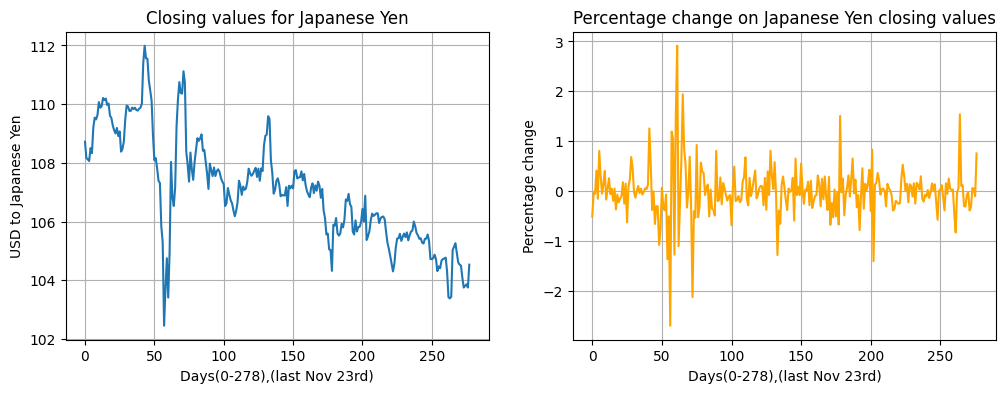

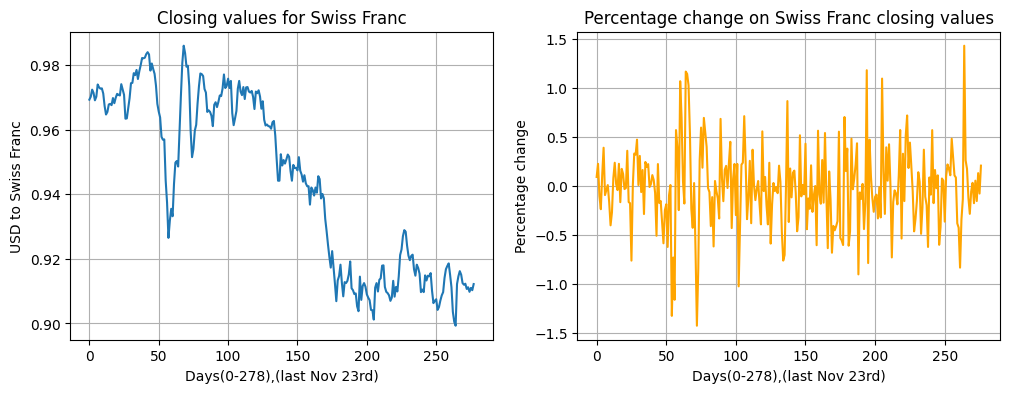

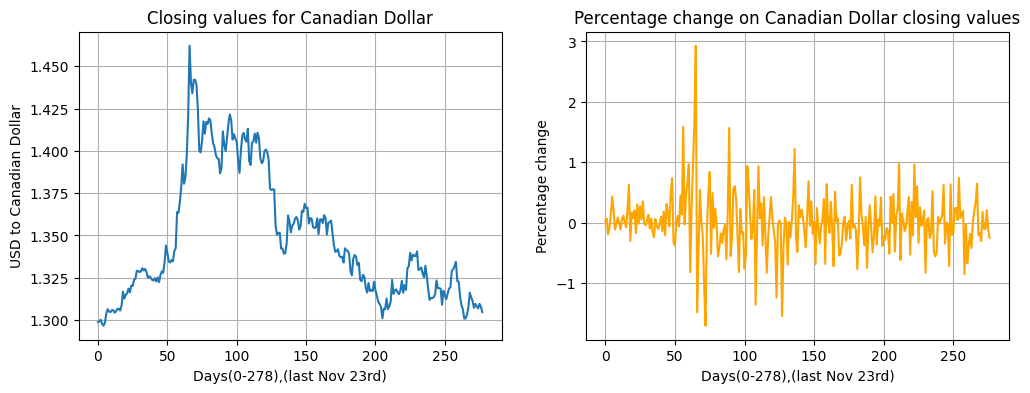

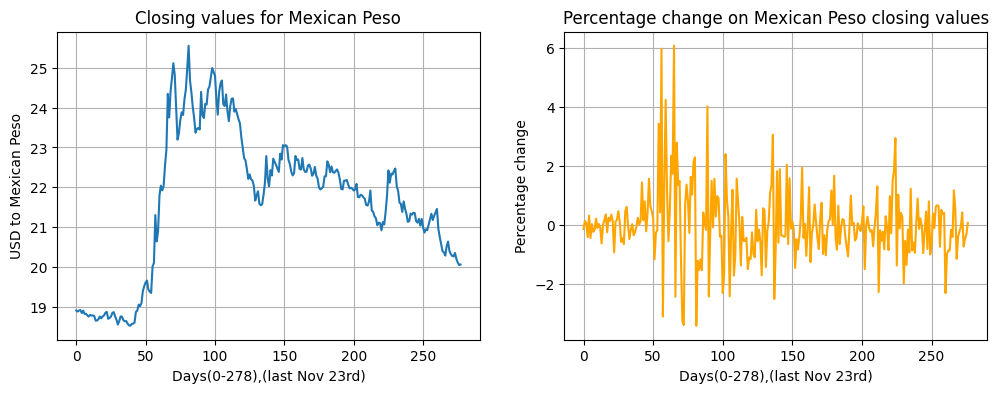

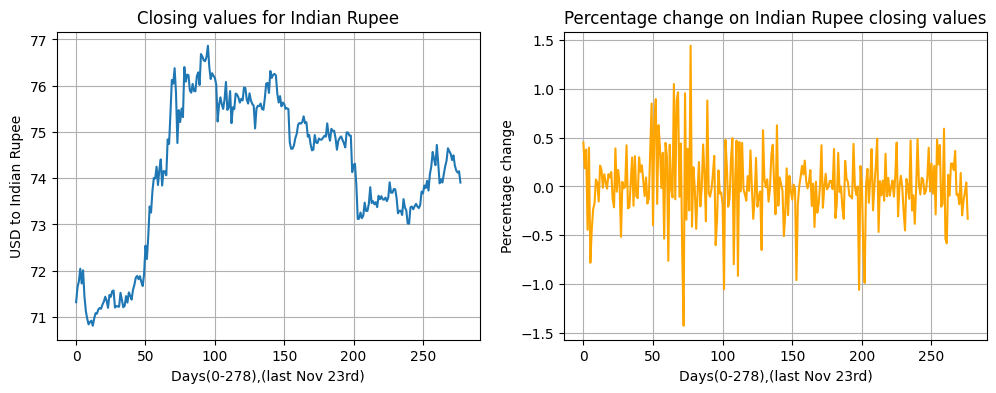

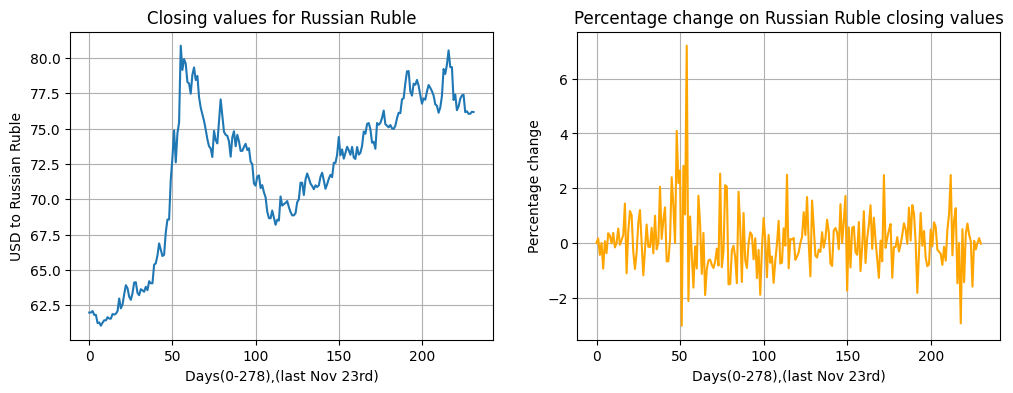

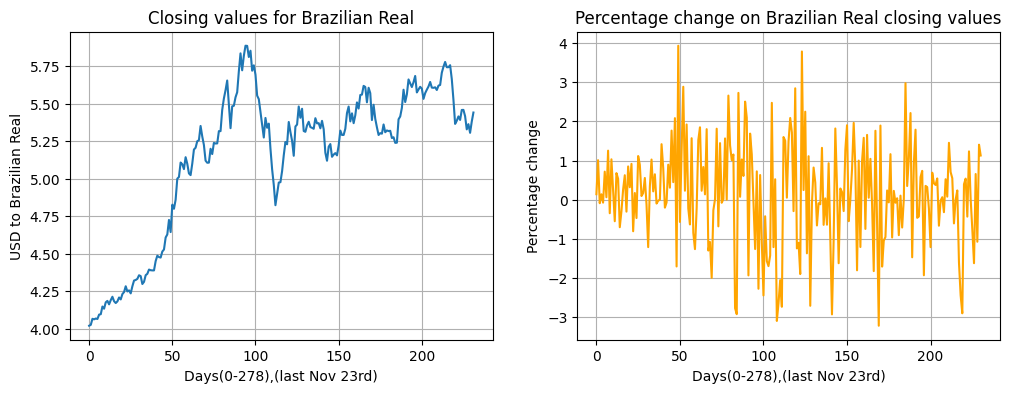

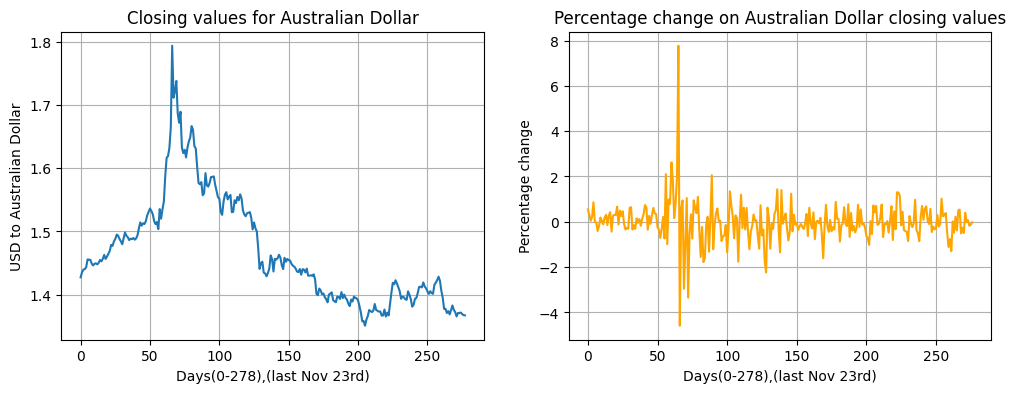

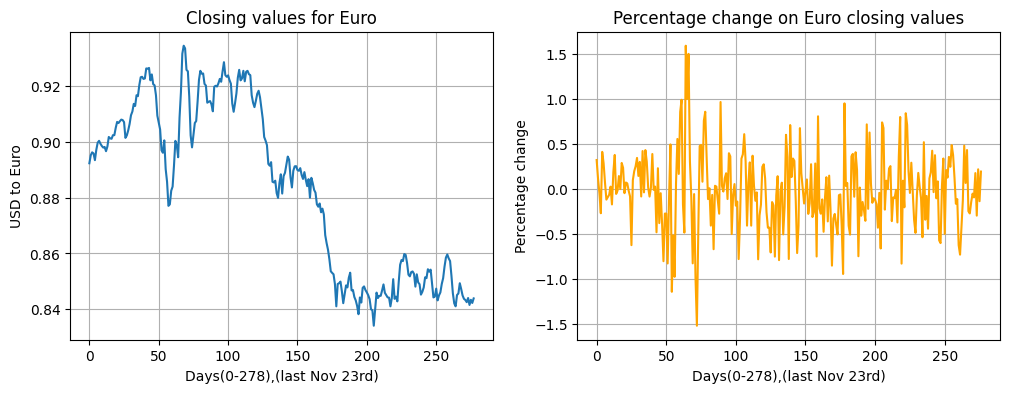

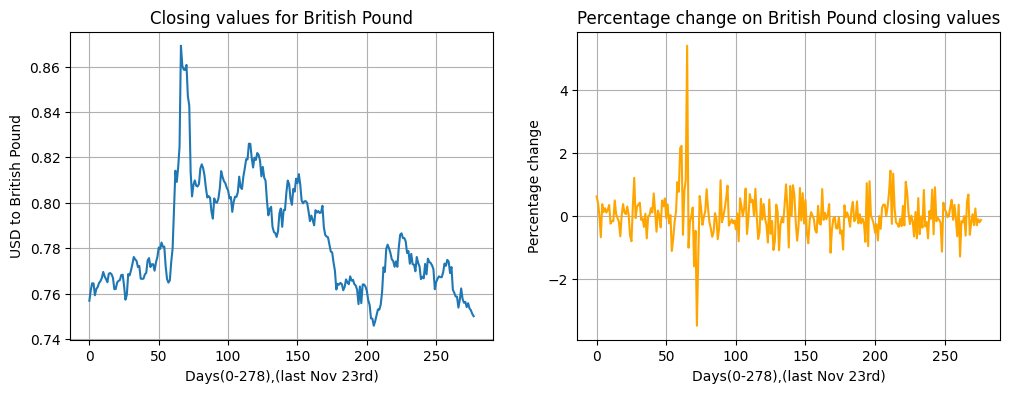

In [26]:
for f, clv in zip(file_order, all_close_vals):
    plot_line_perc(clv, cur_dict[f])